# 로지스틱 회귀 예시

In [113]:
import pandas as pd
passengers = pd.read_csv("titanic.csv")

print(passengers.shape)

(891, 12)


In [114]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
passengers['Sex'] = passengers['Sex'].map({'female':1,'male':0})


In [116]:
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)
# Age 값이 비어있는 경우에 대해 평균 값으로 결측치를 채움
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)
#Pcalss의 경우 1등석에 탔는지, 2등석에 탔는지에 대해 각각의 feature로 만들어주기 위해 컬럼을 새로 생성

In [117]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

In [107]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

In [108]:
#지스틱 회귀는 실행할 때 regularation을 사용하기 때문에 그 전에 반드시 우리가 가진 데이터를 스케일링하는 작업이 필요
#StandardScaler를 사용하면 아래와 같이 데이터를 정규화(스케일링) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [110]:
print(model.score(train_features, train_labels))


0.7694610778443114


In [112]:
print(model.coef_)

[[ 1.14312122 -0.43413008  0.97914636  0.52563822]]


# 다중 회귀분석  

In [60]:
import pandas as pd
df = pd.read_csv("manhattan.csv")
df.head()
# rent 라는 임대료를 예측

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [61]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

## 데이터 세트 분리 (training & Test)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

In [64]:
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

## 모델 생성하기


In [65]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

In [66]:
x_train

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
1294,1.0,1,700,1,2.0,116,0,1,0,1,1,1,0,1
2356,1.0,1,704,1,5.0,30,0,1,1,1,1,0,0,1
1312,3.0,2,1000,3,5.0,116,1,0,0,0,0,0,0,0
1981,1.0,1,550,2,2.0,116,0,0,0,0,0,0,0,0
2601,3.0,2,1150,14,1.0,116,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,2.0,2,1000,4,50.0,15,1,0,0,0,1,0,0,0
130,0.0,1,350,3,4.0,90,0,0,0,0,0,0,0,0
3380,2.0,1,1220,1,4.0,109,0,1,1,1,1,1,0,1
1196,1.0,1,765,2,10.0,30,0,1,0,1,1,0,0,1


In [67]:
y_train

,rent
1294,2700
2356,3100
1312,7995
1981,2695
2601,4700
...,...
3151,5495
130,2025
3380,8200
1196,3700


In [68]:
mlr.fit(x_train, y_train) 

LinearRegression()

In [69]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [70]:
my_predict = mlr.predict(my_apartment)

C:\Users\chjoe\anaconda3\envs\DA\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
y_predict = mlr.predict(x_test)


In [72]:
y_predict

array([[ 3795.20006898],
       [ 7749.52459543],
       [ 7029.94043423],
       [ 4957.00122343],
       [ 4495.3195284 ],
       [ 2793.51401493],
       [ 7253.55368981],
       [ 3639.99904151],
       [ 7631.65789507],
       [ 6015.68782147],
       [ 3629.67461608],
       [ 2639.25460539],
       [ 6763.84077151],
       [ 6216.10314675],
       [ 3543.63442111],
       [ 6546.49254025],
       [ 3121.71990897],
       [ 5525.05027744],
       [13263.0008704 ],
       [ 4586.93771788],
       [ 9591.98369475],
       [ 4657.43265701],
       [ 3138.45648082],
       [ 4516.14373733],
       [11464.52334473],
       [ 1920.7904923 ],
       [ 3158.99577849],
       [ 2715.80018616],
       [ 7954.6214083 ],
       [ 4072.18439168],
       [ 3735.48773312],
       [11175.67671424],
       [ 6461.15143839],
       [ 3675.69448063],
       [ 4046.82141901],
       [10635.95569456],
       [ 7857.48953102],
       [ 3987.81104114],
       [ 4927.05428792],
       [ 5540.12010457],


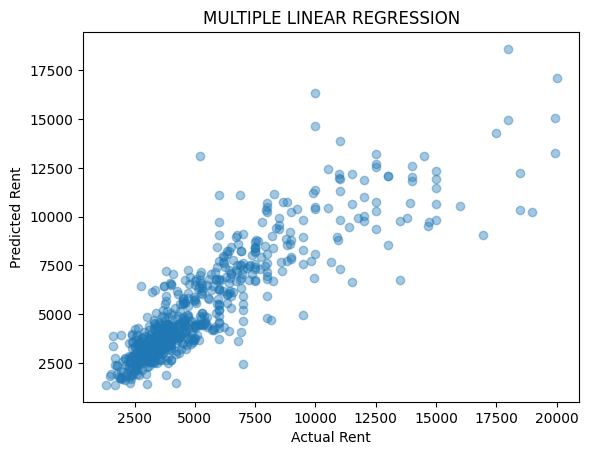

In [73]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [74]:
print(mlr.coef_)


[[-339.72565082 1227.18378185    4.89533735  -16.6268309    23.28064288
    -7.60690037 -154.12809754   99.67652733  126.6406987  -214.50540499
   122.40027594  -57.87786551 -147.43990886   25.46468481]]


## 상관 살펴보기


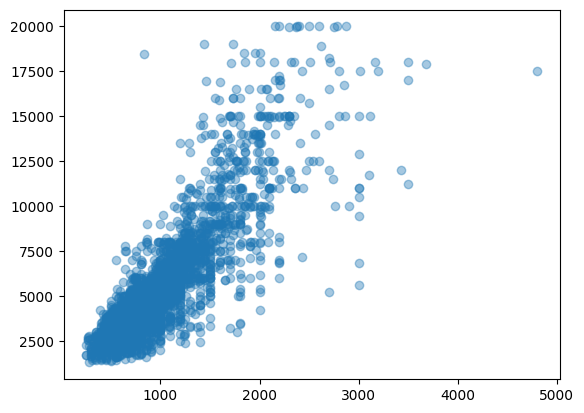

In [75]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

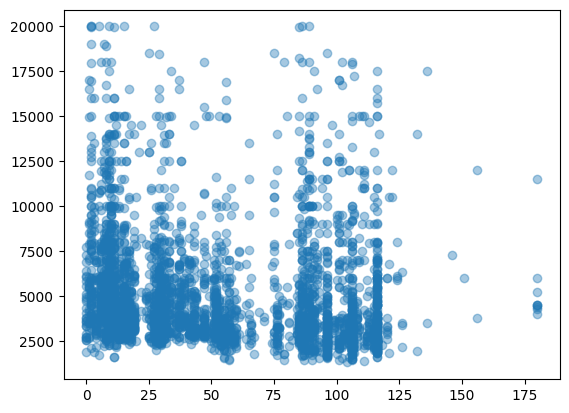

In [76]:
# 주택이 얼마나 오래 전에 지어졌는지 'building_age_yrs'와 가격 'rent'
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

## 모델의 정확도(Accuracy) 평가하기

In [77]:
print(mlr.score(x_train, y_train))
# 주택 임대료의 77%를 저 14개의 항목으로 설명할 수 있다

0.7800151630882293


# 다항 회귀분석 예시

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
filename = '교육부_학생건강검사 결과_20151201.csv'
df = pd.read_csv(filename, encoding='cp949')

In [80]:
df = df.reset_index()

In [81]:
# 불필요한 칼럼 제거
df = df[['몸무게','키']]

In [82]:
# Nan 데이터 제거(공백 데이터)
df = df.dropna()

In [83]:
weight = []
height = []

# 키와 몸무게 칼럼 추출
weight.extend(df['몸무게'])
height.extend(df['키'])

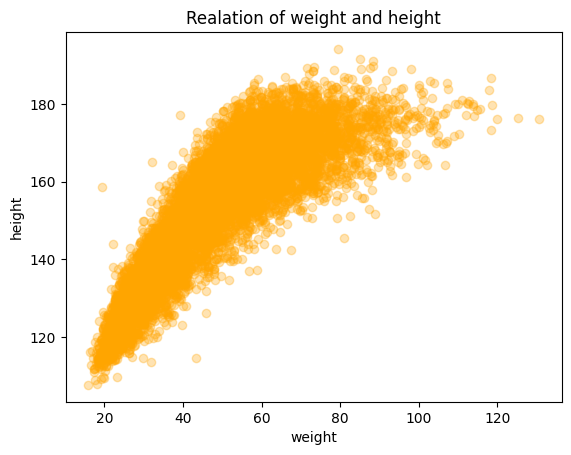

In [84]:
plt.figure()
plt.scatter(weight,height, alpha=0.3,color = 'orange')
plt.title('Realation of weight and height') 
plt.xlabel('weight') 
plt.ylabel('height')
plt.show()

## sklearn을 사용한 다항회귀(Polynomial Regression) 

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [86]:
# PolynomialFeatures 에 맞게 데이터를 변형 시켜줍니다.
weight_real =np.reshape(weight,(-1, 1))

PolynomialFeatures 옵션

degree : 차수 조절
include_bias : True로 할 경우 0차항(1)을 만듬

In [87]:
user_degree = 3 # 3차 다항식
# x 에 대한 제곱근 (다항식 형태로 변환)
poly_features  = PolynomialFeatures(degree=user_degree, include_bias=False) # 3차항으로, 그리고 0차항은 제외
X_train_poly = poly_features.fit_transform(weight_real)

print('real weight : ',weight_real[0])
print('poly : ',X_train_poly[0])
# 입력데이터 x / x가 27.3 /  x^2  745.29 / x^3  20346.417

real weight :  [27.3]
poly :  [   27.3     745.29  20346.417]


In [42]:
#다항 회귀 예측
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, height)
print('intercept : ',lin_reg.intercept_,', coef:' , lin_reg.coef_)
# line_fitter.coef_: 기울기, 다항회귀 공식의 a_1, a_2,..,a_s
# line_fitter.intercept_ : 절편, 다항회귀 공식의 a_0

intercept :  63.1656479678945 , coef: [ 3.23549190e+00 -3.16308653e-02  1.03989595e-04]


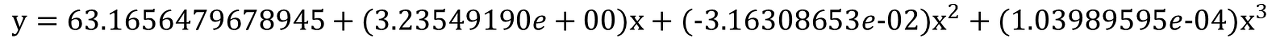

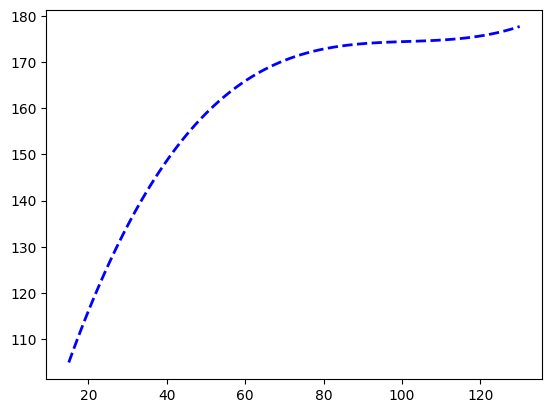

In [43]:
x_new=np.linspace(15, 130, 100).reshape(-1, 1)
y_new = 63.1656479678945+(x_new*3.23549190e+00)+(-3.16308653e-02*x_new**2)+(1.03989595e-04*x_new**3)
plt.plot(X_new,  y_new, "b--", linewidth=2, label="Predictions")

plt.show()

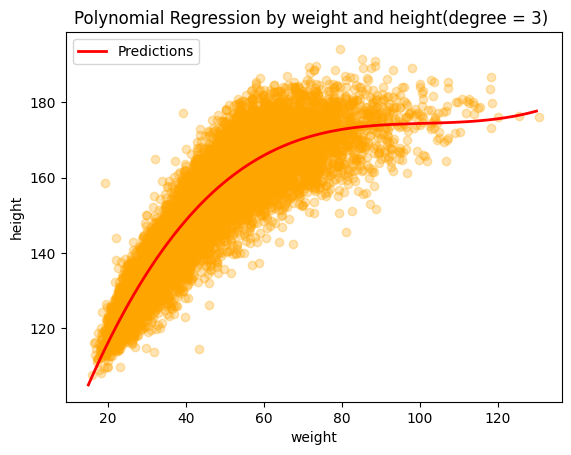

In [39]:
X_new=np.linspace(15, 130, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
print('===============================================')
plt.figure()
plt.scatter(weight, height, alpha=0.3, color ="orange")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.title('Polynomial Regression by weight and height(degree = %d) '%user_degree) 
plt.xlabel("weight")
plt.ylabel("height")
plt.legend(loc="upper left")
plt.show()

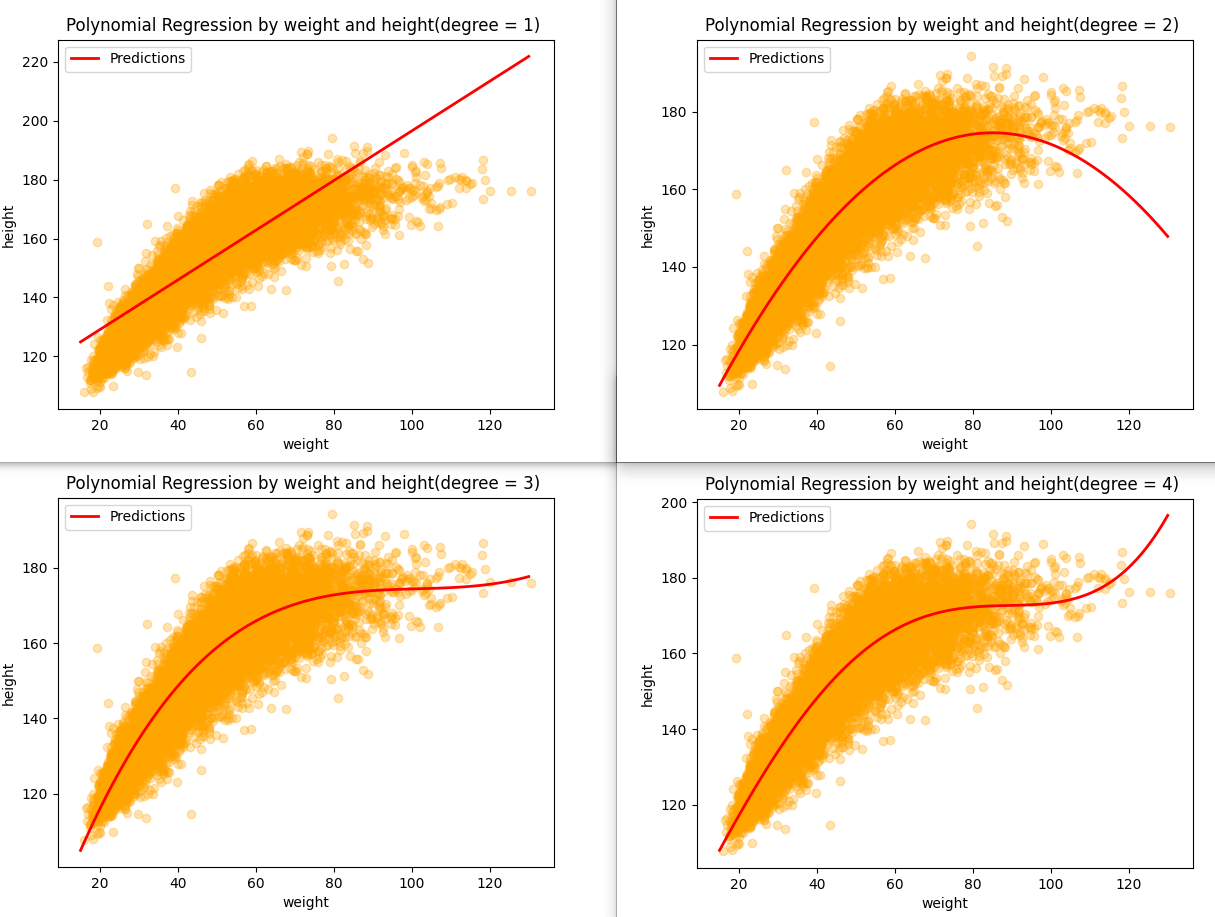